In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import re
import numpy as np 
from scipy import interpolate
from scipy.signal import bspline

In [7]:
# reading data from experiment log
results = {}
f = open('tmp/exp4.log')
last_labeled = -1
last_baseline = -1
result_key = None
result_val = None
for line in f:
    if 'Experiment' in line:
        if result_key is not None:
            results[result_key] = result_val
        result_val = []
        splits = re.split(' |,|=', line)
        baseline = float(splits[6])
        labeled = float(splits[3])
        repeat = float(splits[9])
        result_key = (repeat, baseline, labeled)
    elif 'Test' in line:
        splits = re.split(' |,', line.strip())
        # print(splits)
        v1 = float(splits[9])
        v2 = float(splits[12])
        ensemble = float(splits[15])
        result_val.append((v1, v2, ensemble))
results[result_key] = result_val
# print(splits)
f.close()
labels = [100, 200, 500, 1000]
repeats = [0, 1, 2, 3, 4]

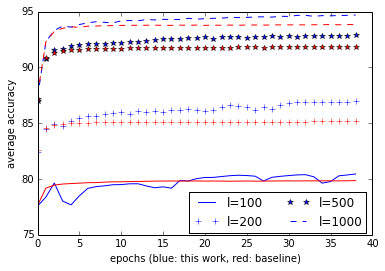

In [62]:
plt.rcParams['axes.color_cycle'] = ['blue', 'red']
first = True
pattern = ['-', '+', '*', '--', '.']
for i, labeled in enumerate(labels):
    for baseline in [0, 1]:
        to_plot = None
        for itr in repeats:  # number of repeats
            for v in [2]:  # ensemble
                # print ("%d, %d, %d" % (baseline, labeled, itr))
                result = results[(itr, baseline, labeled)]
                result = np.array(result).T
                if to_plot is None:
                    to_plot = result[v]
                else:
                    to_plot += result[v]
        label = dict([(0, 'view1'), (1, 'view2'), (2, 'ensemble')])[v]
        to_plot = to_plot / len(repeats)
        x = np.array(range(len(to_plot)))
        y = to_plot * 100
        if baseline == 0:
            plt.plot(x, y, pattern[i], label='l=%d' % labeled)
        else:
            plt.plot(x, y, pattern[i])
    first = False
plt.xlabel('epochs (blue: this work, red: baseline)')
plt.ylabel('average accuracy')
plt.legend(bbox_to_anchor=(1, 0.22), ncol=2)
plt.savefig('fig/fig1.png')

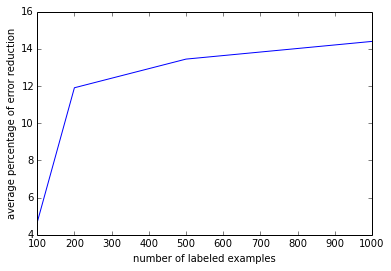

In [82]:
plt.rcParams['axes.color_cycle'] = ['blue', 'red']
plots = [[], []]
for labeled in labels:
    for baseline in [0, 1]:
        point = 0
        for itr in repeats:
            for v in [2]:
                result = results[(itr, baseline, labeled)]
                result = np.array(result).T
                point += np.max(result[v])
        plots[baseline].append(point/len(repeats))

plt.plot(labels, np.array([ (plots[0][i] - plots[1][i]) / (1 - plots[1][i])  for i in range(len(plots[0]))]) * 100, '-')

plt.xlabel('number of labeled examples')
plt.ylabel('average percentage of error reduction')
plt.legend()
plt.savefig('fig/fig2.png')

/v/filer4b/v21q001/beltagy/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  from ipykernel import kernelapp as app


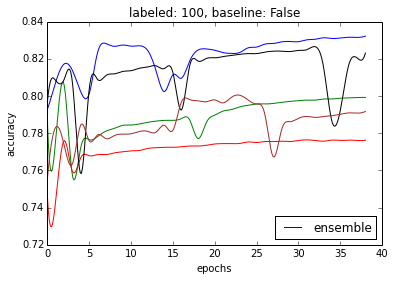

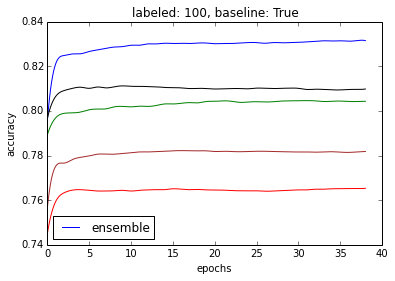

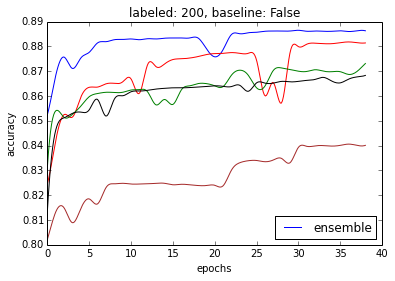

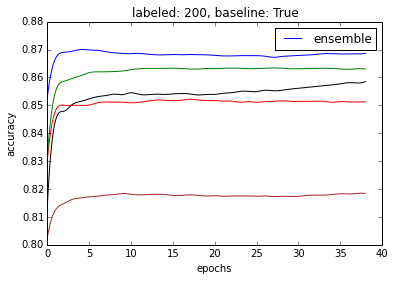

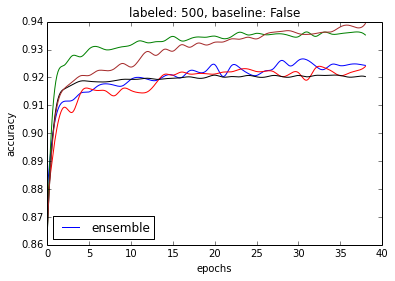

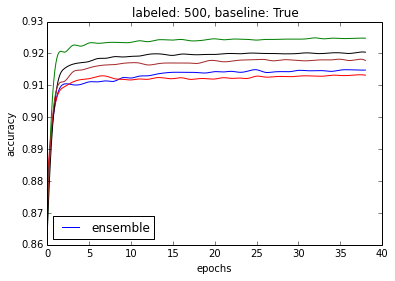

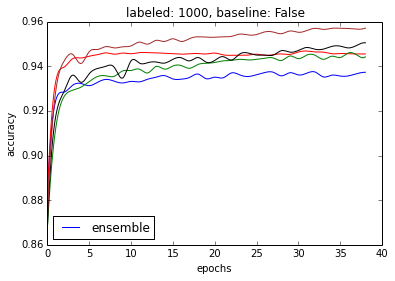

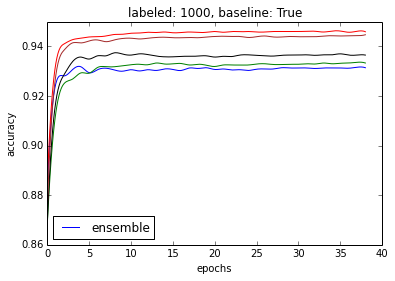

In [59]:
plt.rcParams['axes.color_cycle'] = ['blue', 'red', 'green', 'black', 'brown']
for labeled in labels:
    for baseline in [0, 1]:
        first = True
        for itr in repeats:
            for v in [2]: #[0, 1, 2]:  # view1, view2, ensemble
                # print ("%d, %d, %d" % (baseline, labeled, itr))
                result = results[(itr, baseline, labeled)]
                result = np.array(result).T
                to_plot = result[v]
                label = dict([(0, 'view1'), (1, 'view2'), (2, 'ensemble')])[v]
                x = np.array(range(len(to_plot)))
                xnew = np.linspace(x.min(),x.max(),300)
                y = to_plot
                smooth_y = interpolate.spline(x,y,xnew)
                if first:
                    plt.plot(xnew, smooth_y, label=label,)
                else:
                    plt.plot(xnew, smooth_y)
            first = False
        plt.xlabel('epochs')
        plt.ylabel('accuracy')
        plt.title('labeled: %d, baseline: %s' % (labeled, bool(baseline)))
        plt.legend(loc=0)
        plt.show()
    